# Examen parcial 1 (raizes y ~interpolacion)
* comience con el ejercicio más fácil
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10am del 29.07.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio I

Bajo ciertas condiciones, los dispositivos ópticos como los láseres pueden mostrar un comportamiento complejo en el perfil del rayo de luz.


<table><tr>
<td> <img src="nonlinear_behaviour.png" width="600" /> </td>
</tr></table>
 
Para un dispositivo óptico particular que consiste en un medio no lineal dentro de una cavidad óptica, esto sólo ocurre cuando la intensidad I se encuentra dentro de un cierto rango que está dado por la ecuación: 

$$f(x)=(x+1)^2 - c(x-1) < 0 $$

donde $x$ es la intensidad del campo eléctrico y $c$ es la fuerza de la absorción del 
medio no lineal. 

## 1. Cree una función llamada `f_cost` que reciba dos parámetros (x,c) y solo devuelva la función f(x) como se mencionó anteriormente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as optimize
from scipy.interpolate import interp1d

In [2]:
def f_cost(x,c):
  return (x+1)**2-c*(x-1)

## 2. Usando funcion `f_cost` haz un gráfico con seis curvas para a=5,10,15,20,25,30 y con x entre -10,30 (100 puntos)
* hacer que cada curva sea de un color diferente
* añadir etiquetas
* Para cual `c` esta funcion no tiene raices?

Text(0.5, 1.0, 'Gráficas de la función')

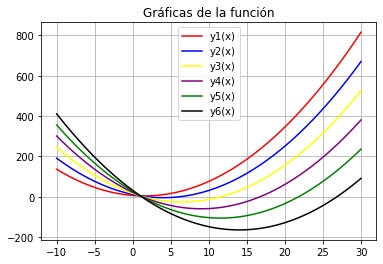

In [3]:
x = np.linspace(-10,30,100)
y1 = f_cost(x,5)
y2 = f_cost(x,10)
y3 = f_cost(x,15)
y4 = f_cost(x,20)
y5 = f_cost(x,25)
y6 = f_cost(x,30)

fig,ax=plt.subplots(1,1)
ax.plot(x,y1,color='red',label='y1(x)')
ax.plot(x,y2,color='blue',label='y2(x)')
ax.plot(x,y3,color='yellow',label='y3(x)')
ax.plot(x,y4,color='purple',label='y4(x)')
ax.plot(x,y5,color='green',label='y5(x)')
ax.plot(x,y6,color='black',label='y6(x)')
ax.grid('True')
ax.legend()
plt.title('Gráficas de la función')

## 3. Usando los valores de 'c' para los cuales la función tiene raíces encontrar raíces izquierdas (Newton o Bisecion) y hacer una gráfica de esas raíces vs c. (preferiblemente use el bucle para encontrar todas las raíces) 

In [5]:
c = [5,10,15,20,25,30]
c = np.array(c)

raices = []

for i in range(0,5):
  r_i = optimize.newton(f_cost,5,args=(c[i],))
  raices.append(r_i)

RuntimeError: Failed to converge after 50 iterations, value is -54.020411521506205.

# Ejercicio II

Los datos para la presión frente a la temperatura de un gas cuantico se dan en el archivo csv ($ \textbf{data_pressure_vs_temperature.csv} $) https://github.com/mhemmg/datasets/tree/master/pressure_vs_temperature

* 1. importar los datos usando pandas
* 2. hacer un gráfico de $P$ vs $T$ (curva tiene que tener etiquieta)
* 3. interpolar los puntos (100 puntos) 
* 4. anadir curva a grafico anterior con datos interpolados de $P_{interp}$ vs $T_{interp}$ (curva tiene que tener etiquieta)
**graficos tienen que tener etiquietas**

In [6]:
!wget https://raw.githubusercontent.com/mhemmg/datasets/master/pressure_vs_temperature/data_pressure_vs_temparature.csv

--2022-08-04 15:45:59--  https://raw.githubusercontent.com/mhemmg/datasets/master/pressure_vs_temperature/data_pressure_vs_temparature.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1412 (1.4K) [text/plain]
Saving to: 'data_pressure_vs_temparature.csv.1'

data_pressure_vs_te 100%[===================>]   1.38K  --.-KB/s    in 0s      

2022-08-04 15:45:59 (7.07 MB/s) - 'data_pressure_vs_temparature.csv.1' saved [1412/1412]



In [7]:
!ls

data_pressure_vs_temparature.csv    examen_parcial_1_ready_vC (1).ipynb
data_pressure_vs_temparature.csv.1


In [8]:
df = pd.read_csv('data_pressure_vs_temparature.csv')
df.head()

,Temperature,Pressure
0,4.789201e-08,1.958251e-17
1,6.625061e-08,2.055515e-17
2,8.460922e-08,2.237848e-17
3,1.029678e-07,2.534132e-17
4,1.213264e-07,2.994527e-17


Text(0.5, 1.0, 'Gráfico de datos')

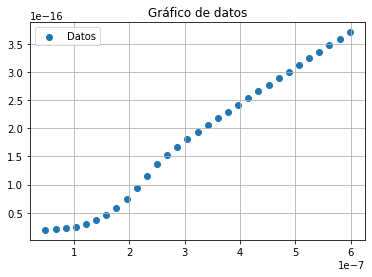

In [9]:
fig,ax=plt.subplots(1,1)
ax.scatter(df['Temperature'],df['Pressure'],label='Datos')
ax.legend()
ax.grid('True')
plt.title('Gráfico de datos')

In [10]:
x = df['Temperature']
y = df['Pressure']

funcion = interp1d(x,y,kind='cubic')


Text(0.5, 1.0, '$P_{interp}$ vs $T_{interp}$')

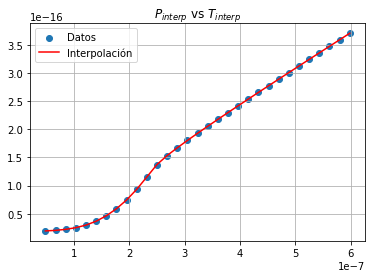

In [11]:
fig,ax=plt.subplots(1,1)
ax.scatter(df['Temperature'],df['Pressure'],label='Datos')
ax.plot(x,y,color='red',label='Interpolación')
ax.legend()
ax.grid('True')
plt.title('$P_{interp}$ vs $T_{interp}$')

#Ejercicio III

El `polilogaritmo` que recibe dos parametros (https://www.mpmath.org/doc/current/functions/zeta.html) es una funcion complicada de calcular 

In [12]:
import mpmath
import math
import numpy as np
import time

#### Para un valor se puede obtener rápidamente el resultado


In [13]:
mpmath.polylog(3.0/2.0, 0.5)

mpf('0.62483702081991388')

#### Para calcular 50 puntos uno necesita mas tiempo

In [14]:
timestamp1 = time.time()
xgrid1=np.linspace(0.0,1.0,50)

poly1=[]
for x in xgrid1:
    poly1.append(mpmath.polylog(3.0/2.0,x))

    
timestamp2 = time.time()
print (f"Esta operacion tomo : {(timestamp2 - timestamp1):.2f} segundos")

Esta operacion tomo : 0.10 segundos


### Aqui es el plot (solo para mostrar el comportamiento)

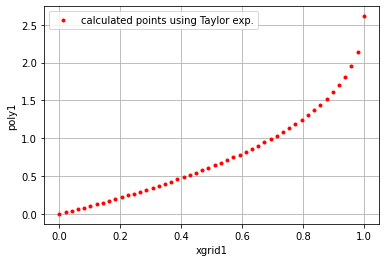

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fig,ax=plt.subplots(1,1)
ax.plot(xgrid1,poly1,'.r',label='calculated points using Taylor exp.')
ax.set_xlabel('xgrid1')
ax.set_ylabel('poly1')

ax.legend()
ax.grid('True')

# 1. Ahora te imaginas que tienes que calcular el polilogaritmo para 50000 puntos. ¿qué harás?

In [16]:
xgrid1=np.linspace(0.0,1.0,50)
ygrid1=poly1
print(xgrid1)
print(ygrid1)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]
[mpf('0.0'), mpf('0.020557073626544669'), mpf('0.041418780541507383'), mpf('0.062595766439226624'), mpf('0.084099281803326403'), mpf('0.10594123027817284'), mpf('0.12813422208904154'), mpf('0.15069163316734741'), mpf('0.17362767074028665'), mpf('0.19695744626631326'), mpf('0.2206970567431237'), mpf('0.24486367558835956'), mpf('0.26947565450146493'), mpf('0.29455263796611336'), mpf('0.32011569235656961'), mpf('0.34618745198129003'), mpf('

# Criterias:

```
# Exercise 1 (max 4p):
#   f_cost + plot (max: 1.5p):                   1.5p   
#   stating for which c no roots (max: 0.5p):    0.0p 
#   left roots + plot (max: 1.0p):               0.5p 
#   right roots + plot (max: 1.0p):              0.0p 

# Exercise 2 (max 4p):
#   loading data + plot (max: 2.0p):             2.0p   
#   interpolating + plot (max. 2.0p):            2.0p 


# Exercise 3 (max 2p):
#   interpolation of polylog (max: 1.0p):        0.0p   
#   func to interp a point (max: 1.0p):          0.0p   

# TOTAL:                                         6.0p (out of 10p) 

```    